# Student Performance

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
students_data = pd.read_csv('C://Users/E. Korhan AKÇAY/Downloads/Student_Performance.csv')

In [6]:
students_data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [7]:
students_data.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [9]:
students_data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [10]:
students_data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

## EDA

<Figure size 1700x800 with 0 Axes>

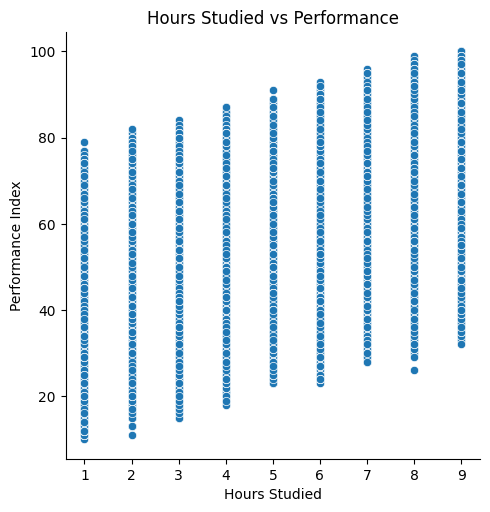

In [11]:
plt.figure(figsize = (17, 8))
sns.relplot(x="Hours Studied", y="Performance Index", data = students_data)
plt.title("Hours Studied vs Performance")
plt.show()

<Figure size 1700x800 with 0 Axes>

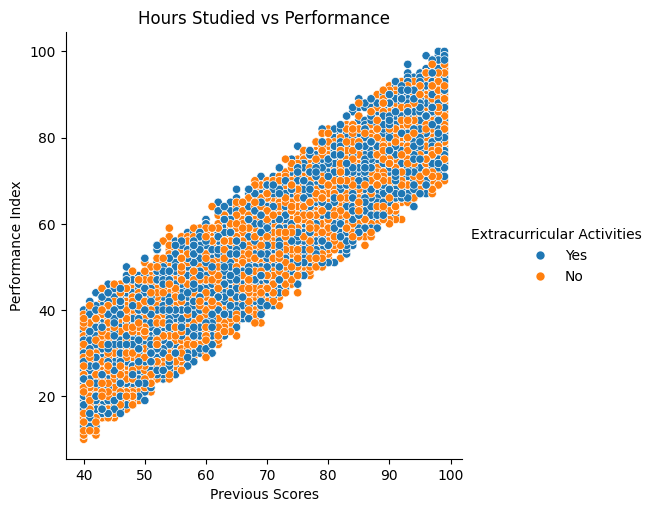

In [12]:
plt.figure(figsize = (17, 8))
sns.relplot(x="Previous Scores", y="Performance Index", hue = "Extracurricular Activities", data = students_data)
plt.title("Hours Studied vs Performance")
plt.show()

<Figure size 1700x800 with 0 Axes>

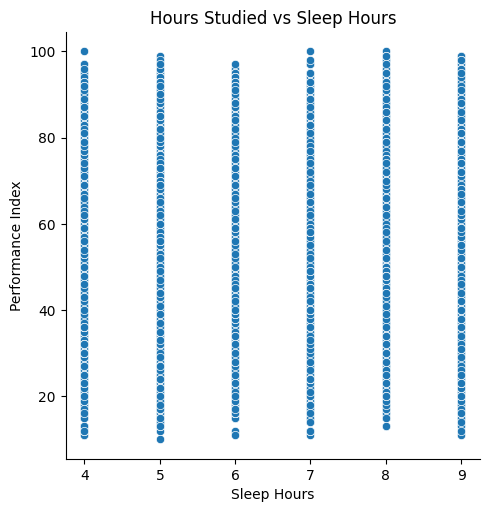

In [14]:
plt.figure(figsize = (17, 8))
sns.relplot(x="Sleep Hours", y="Performance Index", data = students_data)
plt.title("Hours Studied vs Sleep Hours")
plt.show()

<Axes: >

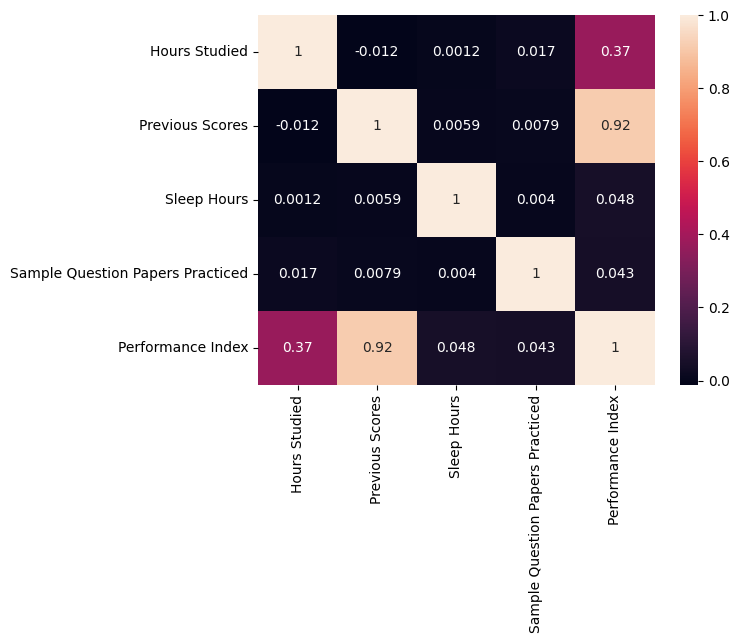

In [17]:
sns.heatmap(students_data.drop("Extracurricular Activities", axis = 1). corr(), annot = True, cmap = "rocket")

In [30]:
import plotly.figure_factory as ff

corr_matrix = students_data.drop("Extracurricular Activities", axis=1).corr()

heatmap = ff.create_annotated_heatmap(z=corr_matrix.values, x=list(corr_matrix.index), y = list(corr_matrix.columns), colorscale='Viridis')

heatmap.show()

## Model Oluşumu

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [32]:
columns = students_data.columns
columns.drop("Extracurricular Activities")

Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [33]:
scalar_data = pd.DataFrame(scaler.fit_transform(students_data.drop("Extracurricular Activities", axis = 1)), columns = students_data.columns.drop("Extracurricular Activities"))

## Train-Test Split

In [35]:
from sklearn.model_selection import train_test_split

x = scalar_data.drop("Performance Index", axis = 1)
y = scalar_data["Performance Index"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

**test_size:** Veri setinin ne kadarının test kümelerine ayrılacağını belirleyen bir oran veya sayı. Örneğin, 0.3 olarak belirtilirse, veri setinin %30’u test kümelerine ayrılırken, 0.3 yerine 100 belirtilirse, veri setinin 100 örneği test kümelerine ayrılır.



**random_state:** random_state parametresi, bir algoritmanın rastgele sayı üretme işlemlerinde aynı sonuçları üretmesini sağlamak için kullanılan bir parametredir. Belirli bir sayı değeri verildiğinde, aynı girdi ile her çalıştırmada aynı çıktıyı alırsınız. Bu sayede sonuçlar tekrarlanabilir ve karşılaştırılabilir hale gelir.

random_state=42: Aynı kodu farklı zamanlarda veya farklı makinelerde çalıştırdığınızda aynı sonuçları elde etmenizi sağlar.


In [36]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x_train, y_train)

LinearRegression()

In [39]:
print("Coefficients: ", lr.coef_)
print("Intercept: ", lr.intercept_)

Coefficients:  [0.38488197 0.91756983 0.04178348 0.02842324]
Intercept:  0.00109363021917485


In [41]:
from sklearn.metrics import r2_score

predictions = lr.predict(x_test)
print("R-squared: ", r2_score(y_test, predictions))

R-squared:  0.9887299686226686


In [59]:
from sklearn import metrics

def model_evaluation(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    R2_Score = metrics.r2_score(y_test, y_pred)
    
    return pd.DataFrame([MAE, MSE, RMSE, R2_Score], index=['MAE', 'MSE', 'RMSE' ,'R2-Score'], columns=[model_name])

In [61]:
model_evaluation(lr, x_train, y_train, 'Multiple Linear Regression')

,Multiple Linear Regression
MAE,0.085558
MSE,0.011593
RMSE,0.107671
R2-Score,0.988409


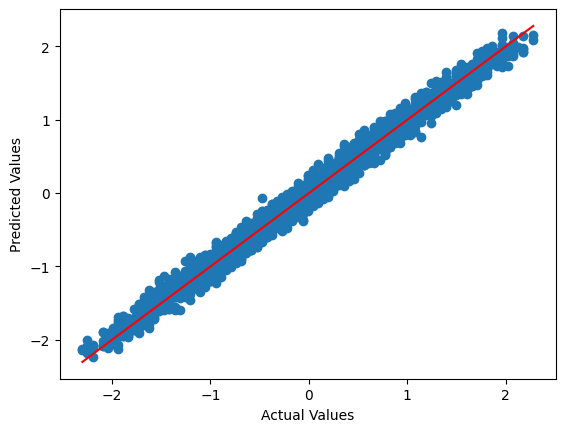

In [43]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # A red line representing perfect prediction
plt.show()

In [44]:
train_predictions = lr.predict(x_train)
print("Training Set R-squared: ", r2_score(y_train, train_predictions))

test_predictions = lr.predict(x_test)
print("Test Set R-squared: ", r2_score(y_test, test_predictions))

Training Set R-squared:  0.9884089428029412
Test Set R-squared:  0.9887299686226686


(0.0, 1.0)

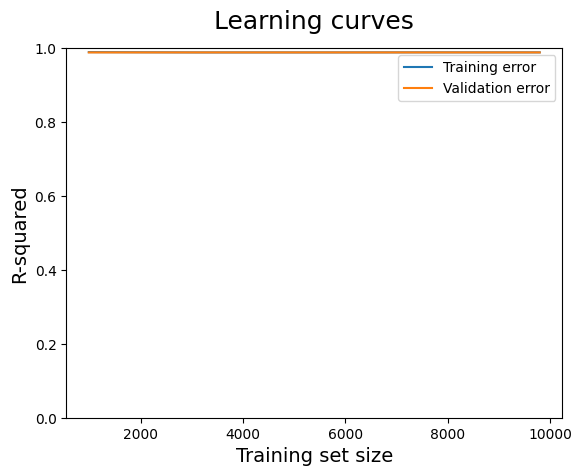

In [48]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(lr, x, y, cv=50)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Validation error')
plt.ylabel('R-squared', fontsize=14)
plt.xlabel('Training set size', fontsize=14)
plt.title('Learning curves', fontsize=18, y=1.03)
plt.legend()
plt.ylim(0,1)

# OLS Yöntemi

In [54]:
import statsmodels.api as sm

x = scalar_data.drop("Performance Index", axis = 1)
y = scalar_data["Performance Index"]

X = sm.add_constant(x)
X.head()

,const,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
0,1.0,0.775188,1.704176,1.456205,-1.249754
1,1.0,-0.383481,0.723913,-1.492294,-0.900982
2,1.0,1.161410,-1.063626,0.276805,-0.900982
3,1.0,0.002742,-1.005963,-0.902594,-0.900982
4,1.0,0.775188,0.320275,0.866505,0.145333


In [56]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Performance Index   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 2.147e+05
Date:                Mon, 03 Jun 2024   Prob (F-statistic):               0.00
Time:                        15:13:32   Log-Likelihood:                 8136.8
No. Observations:               10000   AIC:                        -1.626e+04
Df Residuals:                    9995   BIC:                        -1.623e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                              4.25e-17      0.001   3.96e-14      1.000      -0.002       0.002
Hours Studied                        0.3846      0.001    358.403      0.000       0.382       0.387
Previous Scores                      0.9195      0.001    857.021      0.000       0.917       0.922
Sleep Hours                          0.0420      0.001     39.193      0.000       0.040       0.044
Sample Question Papers Practiced     0.0291      0.001     27.152      0.000       0.027       0.031
==============================================================================
Omnibus:                        1.962   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.375   Jarque-Bera (JB):                1.977
Skew:                           0.009   Prob(JB):                        0.372
Kurtosis:                       3.067   Cond. No.                         1.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Coefficients:  [0.38488197 0.91756983 0.04178348 0.02842324]
Intercept:  0.00109363021917485

## Polynomial Regression

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [3]:
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['PRICE'] = california.target

In [4]:
X = df[['MedInc', 'HouseAge', 'AveRooms']].values
y = df['PRICE'].values

In [5]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

In [6]:
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [7]:
from sklearn.metrics import r2_score

predictions = model.predict(x_test)
print("R-squared: ", r2_score(y_test, predictions))

NameError: name 'x_test' is not defined

In [ ]:
from sklearn import metrics

def model_evaluation(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    R2_Score = metrics.r2_score(y_test, y_pred)
    
    return pd.DataFrame([MAE, MSE, RMSE, R2_Score], index=['MAE', 'MSE', 'RMSE' ,'R2-Score'], columns=[model_name])

In [ ]:
model_evaluation(lr, x_train, y_train, 'Multiple Linear Regression')

,Multiple Linear Regression
MAE,0.085558
MSE,0.011593
RMSE,0.107671
R2-Score,0.988409


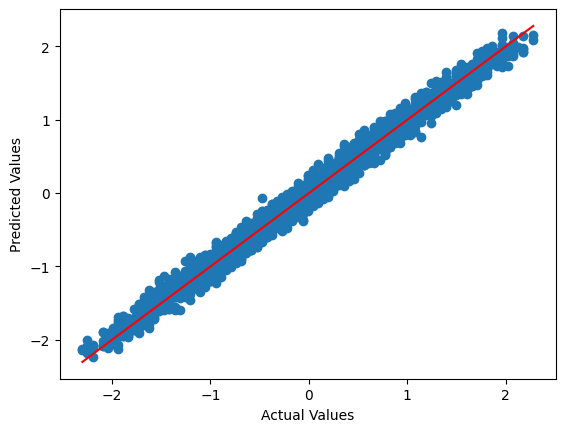

In [ ]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # A red line representing perfect prediction
plt.show()

In [ ]:
train_predictions = lr.predict(x_train)
print("Training Set R-squared: ", r2_score(y_train, train_predictions))

test_predictions = lr.predict(x_test)
print("Test Set R-squared: ", r2_score(y_test, test_predictions))

Training Set R-squared:  0.9884089428029412
Test Set R-squared:  0.9887299686226686


(0.0, 1.0)

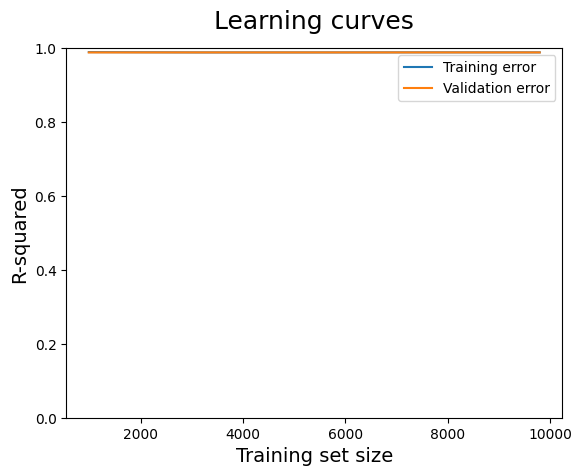

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(lr, x, y, cv=50)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Validation error')
plt.ylabel('R-squared', fontsize=14)
plt.xlabel('Training set size', fontsize=14)
plt.title('Learning curves', fontsize=18, y=1.03)
plt.legend()
plt.ylim(0,1)

## Ridge Regression

## Lasso Regression

## Elastic Net Regression

## Robust Regression

## Support Vector Regression